In [1]:
#import general packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%history

#import general packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%history


1)Task 1 California Housing Data cleanup


a)Import data

In [3]:
#Import California Housing dataset
import os # so u can interact with operating system,e.g creating folders
import tarfile #deal with compressed file .tar .tar.gz. .tgz
import urllib.request #allow downloading file from web
import pandas as pd # import panda for data working with excel/csv
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/" #url of the housing data
HOUSING_PATH = os.path.join("datasets", "housing") # create a local folder,for dataset to be saved in datasets/housing
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz" #full link url to download housing data

#This function creates a folder for the dataset, downloads it and extract all concents in the folder.
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path): #if folder does not exist, make folder
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz") # where tgz file will be saved
    urllib.request.urlretrieve(housing_url, tgz_path) # download file from housing url and save it to tgz_path
    housing_tgz = tarfile.open(tgz_path) # open the compressed tgz file
    housing_tgz.extractall(path=housing_path) #extract all content in the file
    housing_tgz.close()  # close the file

fetch_housing_data()

#read the csv file for housing
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()


/tmp/ipython-input-1116543498.py:17: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path) #extract all content in the file


b) Quick Cleaning up data

In [4]:
#Cleaning  up data
#part 1 general inspection
housing.head() #check first 5 row

housing.info()  #check column info, from this the totalbedrooms seem to have plenty of missing datas
housing.isnull().sum() # counting missing value in each column of data frame, confirmed 207 missing values in bedrooms

housing.describe() #quick stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


From previous cell, we see that there are missing values in total_bedrooms, so we will remove the rows with the missing values since these rows only contribute to 1% of the total dataset.

In [5]:
# Fix missing values,for the total bedrooms,adopt simplest approaches
# delete them since 207 out of 20640 is only around 1 percent of total data.
housing.dropna(subset=["total_bedrooms"], inplace=True)

housing.describe() #quick stats again, we can see that the mean,std,etc isn't affected very much




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing.drop_duplicates(inplace=True) # remove dupliccated rows
housing.describe() #quick stats again, we can see that there are no duplicated rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


part c) looking at data distribution and performing addittional data cleaning, scaling

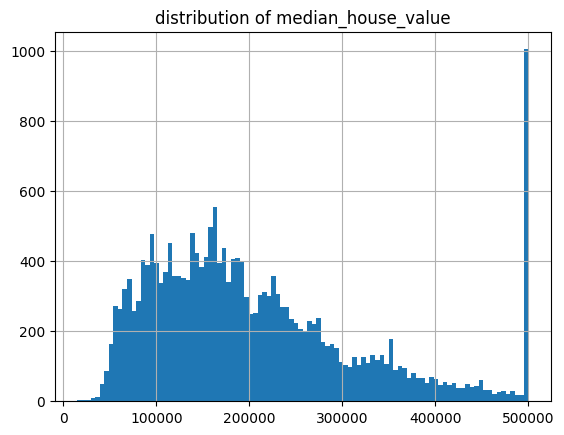

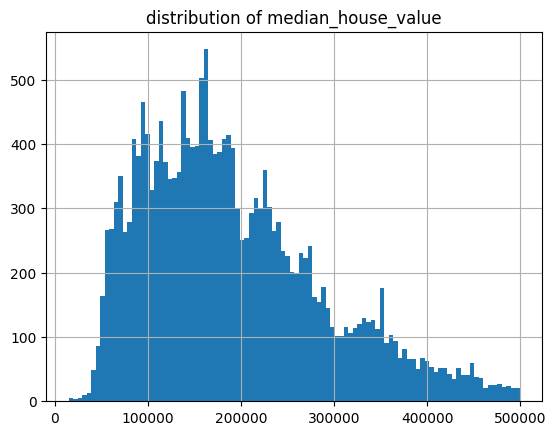

In [7]:
#Looking at outliers and remove them
import matplotlib.pyplot as plt
housing["median_house_value"].hist(bins=100) # it seems like many houses at 500000,
plt.title("distribution of median_house_value")
plt.savefig("Median_house_value distribution")
plt.figure()


# that 500000 cap is not good for statistical analysis,so remove rows with housing price 500000 and above
# it seems like median value around 500000 is an main mode
housing = housing[housing["median_house_value"] < 500000]#remove housing values bigger than 500000
housing["median_house_value"].hist(bins=100)
plt.title("distribution of median_house_value")
plt.savefig("Median_house_value Histogram after cleanup")




Here we removed values of houses above 500000$, because it is capped at 500000$ and  not removing it would lead to inaccurate prediction around and beyond 500000$.

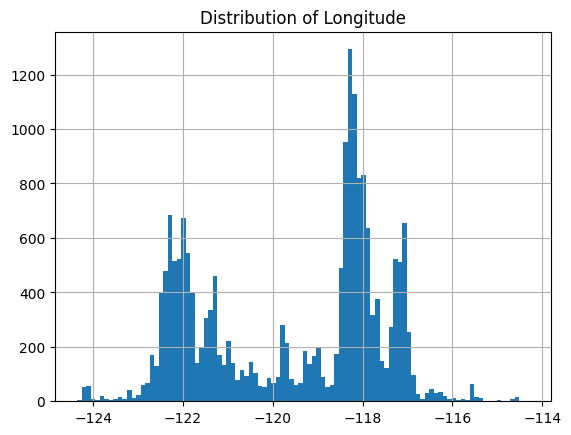

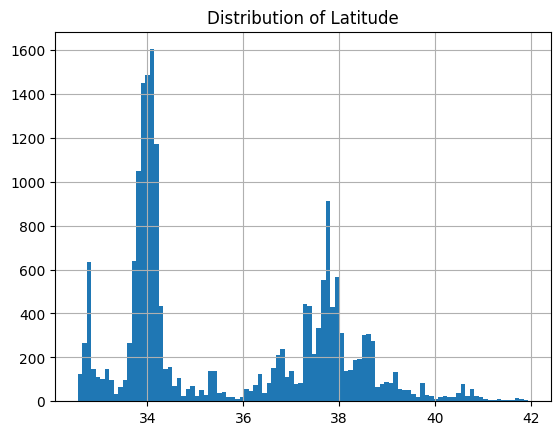

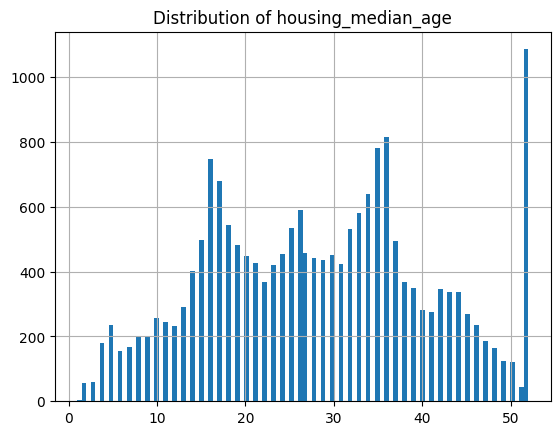

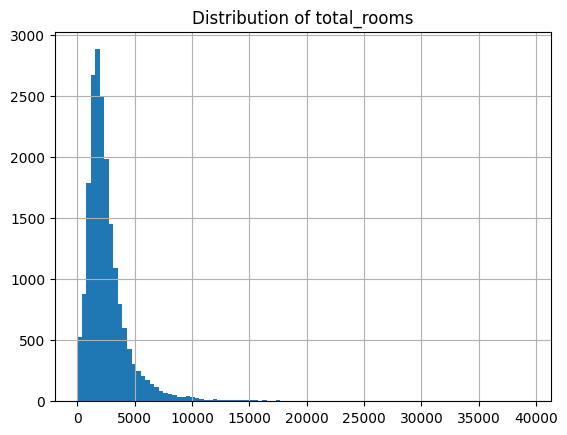

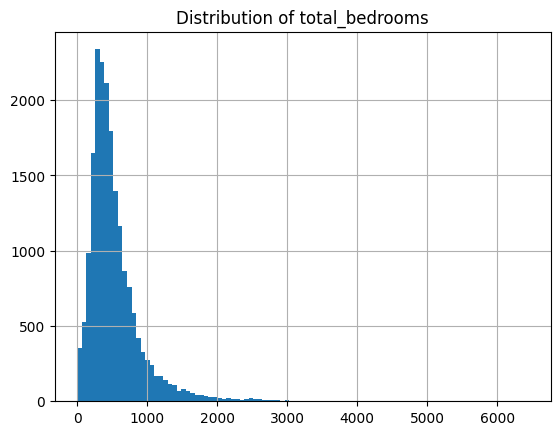

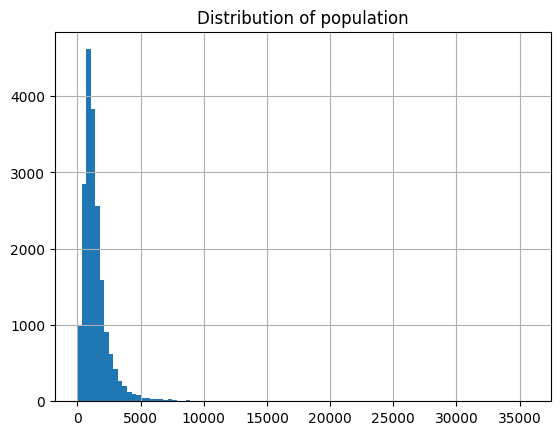

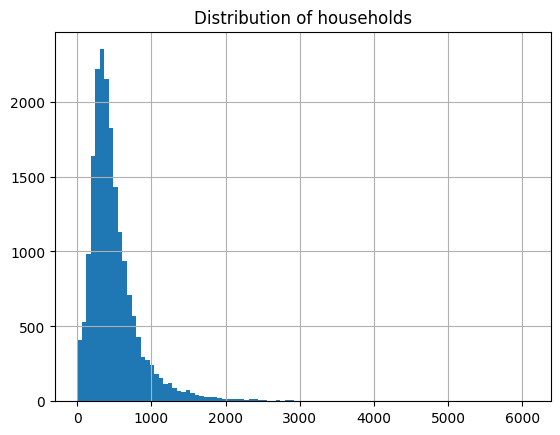

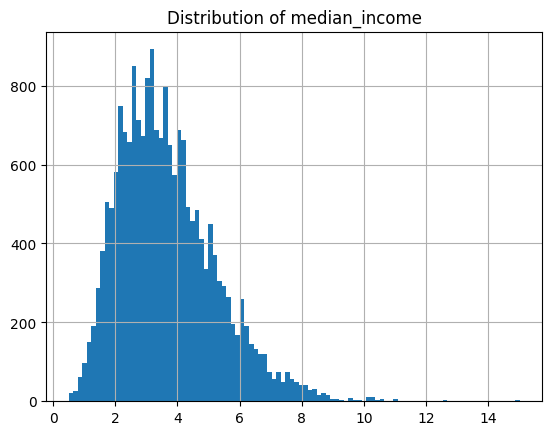

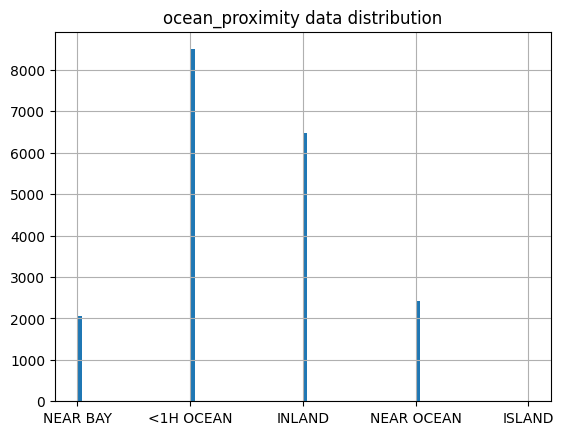

In [8]:
# Continuing look at data distribution
plt.figure()
housing["longitude"].hist(bins=100)
plt.title("Distribution of Longitude")
plt.savefig("longitude distribution")

plt.figure()
housing["latitude"].hist(bins=100)
plt.title("Distribution of Latitude")
plt.savefig("Latitude distribution")

plt.figure()
housing["housing_median_age"].hist(bins=100)
plt.title("Distribution of housing_median_age")
plt.savefig("housing_median_age distribution")

plt.figure()
housing["total_rooms"].hist(bins=100)
plt.title("Distribution of total_rooms")
plt.savefig("total_rooms distribution")

plt.figure()
housing["total_bedrooms"].hist(bins=100)
plt.title("Distribution of total_bedrooms")
plt.savefig("total_bedrooms distribution")

plt.figure()
housing["population"].hist(bins=100)
plt.title("Distribution of population")
plt.savefig("population distribution")

plt.figure()
housing["households"].hist(bins=100)
plt.title("Distribution of households")
plt.savefig("households distribution")

plt.figure()
housing["median_income"].hist(bins=100)
plt.title("Distribution of median_income")
plt.savefig("median_income distribution")

plt.figure()
housing["ocean_proximity"].hist(bins=100)
plt.title("ocean_proximity data distribution")
plt.savefig("ocean_proximity distributio")

Looking at all the data distribution above, only housing age have an issue of capped at 52 year old, so not removing it would affect the age vs value relationship, therefore it is removed.
Out of all the data variables, only ocean_proximity is categorical, we will first discuss distribution of the rest(which are numerical):
Most of the varaibles are distributed close to gaussian(except housing looks a bit heavy tailed,), the longitude, latitude and house age datas concentrated around 2 modes while the rest concentrated around one main mode.
Note that the housing age is have a cap at 52 lead to a high peak at the right, we would be removing that peak in the next section for
For the ocean proximity:
As expected, the peaks only occurs at 4 different categorizies, the island houses are only 5 in numbers, so its peak is negligible comparing to the other 4 locations.

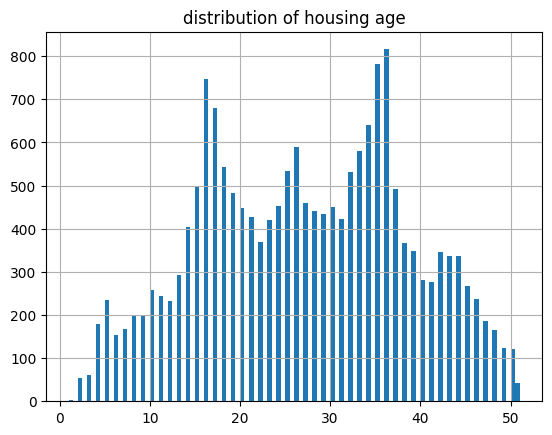

In [9]:
#remove  housingage oldler than 52


housing = housing[housing["housing_median_age"] < 52]#remove housing values bigger than 500000
housing["housing_median_age"].hist(bins=100)
plt.title("distribution of housing age")
plt.savefig("housing_median_age Histogram after cleanup")



After taking a look at eah data distribution independently, we will check the varaible correlations.


(e) Exploring relationships with median house value...


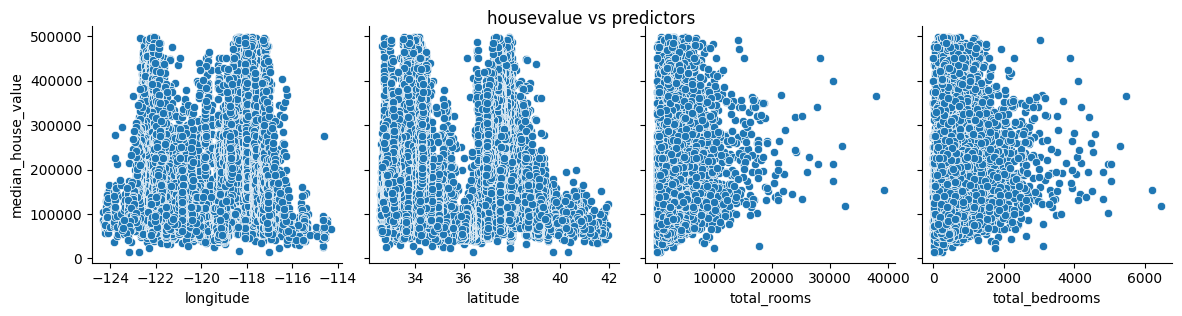

<Figure size 640x480 with 0 Axes>

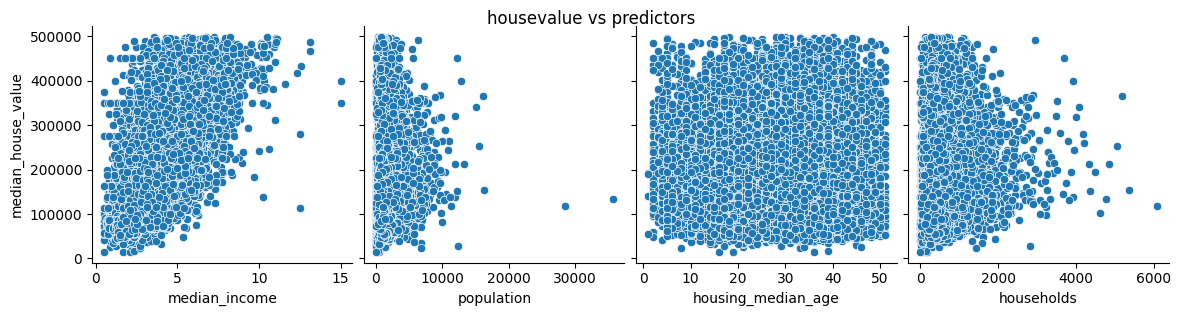

In [10]:
print("\n(e) Exploring relationships with median house value...")

# Scatterplots: mpg vs other quantitative predictors
sns.pairplot(housing, x_vars=["longitude","latitude","total_rooms","total_bedrooms"], y_vars="median_house_value", height=3, aspect=1, kind="scatter")
plt.suptitle("housevalue vs predictors", y=1.02)
plt.show()

plt.figure()
sns.pairplot(housing, x_vars=["median_income","population","housing_median_age","households",], y_vars="median_house_value", height=3, aspect=1, kind="scatter")
plt.suptitle("housevalue vs predictors", y=1.02)
plt.show()

From looking at the relationship above, one can see that the shapes of the households number, total rooms, total bedrooms and populations exhibit similar trend. This suggests that variables are highly correlated as more pouplation often means more construction of houses that generally implies more total rooms and more total bedrooms. We can say that all of these 4 variables says about the housing density at a geographic coordinates.
We will perform a correlation test between the 4 variables to validfy the previous statement.


In [11]:
# Select the 3 variables
subset = housing[["total_rooms", "total_bedrooms", "households","population"]]

# Correlation matrix (Pearson by default)
corr_matrix = subset.corr()
print(corr_matrix)

                total_rooms  total_bedrooms  households  population
total_rooms        1.000000        0.935415    0.922493    0.860279
total_bedrooms     0.935415        1.000000    0.978815    0.880314
households         0.922493        0.978815    1.000000    0.910656
population         0.860279        0.880314    0.910656    1.000000


As one can see, the values are all near 1 with lowest 0.86(still suggesting a very strong correlation), indicating high positive correlation. For prediction purpose, we can then use only one of 4 variable. As a choice,total rooms are chosen.
Now, let's check other variables, from plots above, it seems like the housing age and the value is ill-correlated.

In [12]:
# Select the 2 variables
subset = housing[["housing_median_age","median_house_value"]]

# Correlation matrix (Pearson by default)
corr_matrix = subset.corr()
print(corr_matrix)

                    housing_median_age  median_house_value
housing_median_age            1.000000            0.014647
median_house_value            0.014647            1.000000


Correlations are low, and from the graph, there isn't even a rough trend of age vs value, mainly looks like uniformly spreaded out points.
It would be reasonable to removed, but we would keep it first to see if the model performs well even by keeping it.
Thus, we will remove varaibles, households, population, total_bedrooms.
The 5 predictors left are latitude,longitude,housing age,median income and total rooms.
We can still use the full varaible set using housing.


In [13]:
housing_dropped1=housing.drop(['total_bedrooms', 'households','population'], axis=1) # drop these 3 rows
housing_dropped2=housing.drop(["housing_median_age"], axis=1)


But we haven't dealt with the categorical predictors yet, let's first look at its relationship with values of housing:


<Figure size 640x480 with 0 Axes>

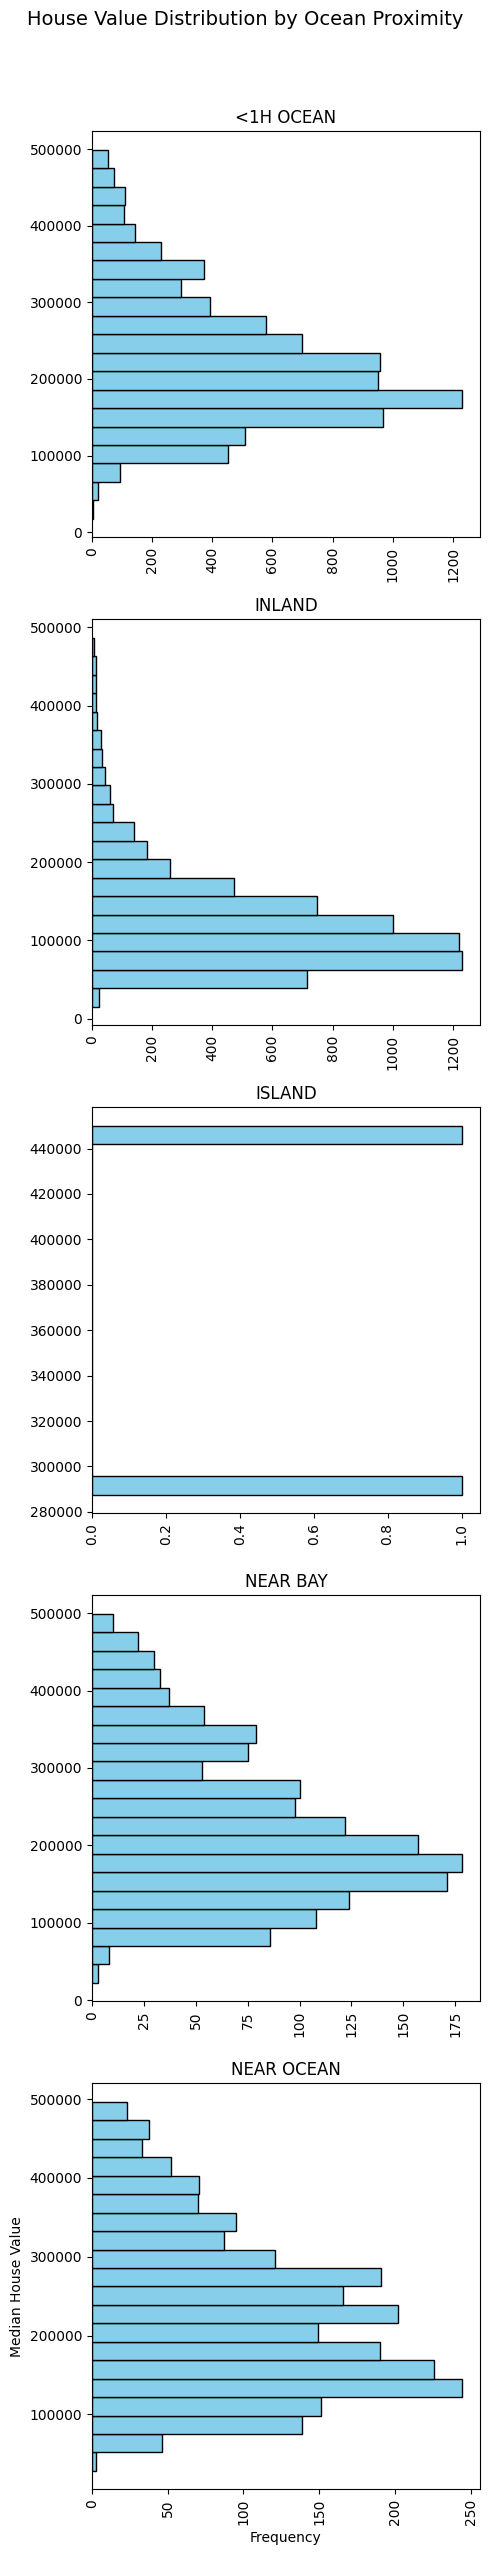

In [14]:
plt.figure()
housing.hist(column="median_house_value", by="ocean_proximity",
          bins=20, figsize=(5,25), layout=(len(housing["ocean_proximity"].unique()), 1),
          orientation="horizontal", color="skyblue", edgecolor="black")

plt.suptitle("House Value Distribution by Ocean Proximity", y=1.02, fontsize=14)
plt.xlabel("Frequency")
plt.ylabel("Median House Value")
plt.tight_layout()
plt.show()

By looking at the ocean proximity, we can see that houses that are closer to ocean generally have more expensive housing (near ocean, <1 hr to ocean and near bay), all concentrated around 200000. While the inland is concentrated around 100000. And island house all seems to be expensive with cheapest 300000+, but there is too little island samples so it would insufficient to make a judgement on the island location vs value of housing.
We can split this categorical predictor into 5 0/1 numerical predictors, where the 5 varaibles are "NEAR_OCEAN", "NEAR_BAY","ISLAND","INLAND","<1H OCEAN". For example, if "NEAR_OCEAN"=True, the variable would be 1 and the rest of them would be zero.

In [15]:
#
housing_encoded = pd.get_dummies(housing_dropped2, columns=["ocean_proximity"])
#using get dummies(Each variable is converted in as many 0/1 variables as there are different values.)

print(housing_encoded.head())
housing_analysis=housing_encoded.describe()
print(housing_analysis)

#In the end, 7 pure numerical variables with 5 0/1 variables. 1 numerical target variables

    longitude  latitude  total_rooms  total_bedrooms  population  households  \
0     -122.23     37.88        880.0           129.0       322.0       126.0   
1     -122.22     37.86       7099.0          1106.0      2401.0      1138.0   
8     -122.26     37.84       2555.0           665.0      1206.0       595.0   
15    -122.26     37.85       1120.0           283.0       697.0       264.0   
18    -122.26     37.84       2239.0           455.0       990.0       419.0   

    median_income  median_house_value  ocean_proximity_<1H OCEAN  \
0          8.3252            452600.0                      False   
1          8.3014            358500.0                      False   
8          2.0804            226700.0                      False   
15         2.1250            140000.0                      False   
18         1.9911            158700.0                      False   

    ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                    False    

We will scale the all data first using gaussian like distribution, for each variable x it becomes(x-mean)/ std.

In [16]:
#
numeric_cols = housing_encoded.select_dtypes(include="number").columns # select only numeric cllumns
housing_encoded[numeric_cols] = (housing_encoded[numeric_cols] -
                                 housing_encoded[numeric_cols].mean()) /housing_encoded[numeric_cols].std()

print(housing_encoded.head())



    longitude  latitude  total_rooms  total_bedrooms  population  households  \
0   -1.385624  1.063667    -0.803238       -0.975502   -0.986311   -0.981995   
1   -1.380576  1.054358     1.987527        1.299280    0.799587    1.615493   
8   -1.400770  1.045049    -0.051585        0.272485   -0.226939    0.221782   
15  -1.400770  1.049703    -0.695538       -0.616938   -0.664179   -0.627792   
18  -1.400770  1.045049    -0.193389       -0.216465   -0.412487   -0.229955   

    median_income  median_house_value  ocean_proximity_<1H OCEAN  \
0        2.950369            2.761925                      False   
1        2.935208            1.774939                      False   
8       -1.027647            0.392528                      False   
15      -0.999237           -0.516842                      False   
18      -1.084533           -0.320703                      False   

    ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                    False    

In [17]:
data_train=housing_encoded.sample(frac=0.7, random_state=42)
Y_train=data_train["median_house_value"]
X_train=data_train.drop(columns=["median_house_value"])


X_train=np.array(X_train)
print(X_train.shape)

Y_train=np.array(Y_train).reshape(-1,1)
print(Y_train.shape)

data_test = housing_encoded.drop(data_train.index)

Y_test= data_test["median_house_value"]
X_test= data_test.drop(columns=["median_house_value"])

X_test = np.array(X_test)
Y_test = np.array(Y_test).reshape(-1, 1)

n=int(len(X_train[0,:]))



(12853, 12)
(12853, 1)


 ## Ridge Regression


In [18]:
"""
        #compute gradient
        for  i in range(0,m):
            y_i=Y[i]
            x_i=np.reshape(X[i,:],(n,1))
            err=(y_i-(W_current.T@ x_i+b_current)).item()
            b_grad+=-2/m*err
            for j in range(0,n): # W_grad_j have m terms, there are n W_Grad term
                x_ij=X[i,j]
                W_grad[j,0]+=-2/m*x_ij*err
        W_grad+=2*self.penalty*W_current



         m, n = X.shape
        total_cost = 0.0
        for i in range(m):
            y_i = Y[i]
            x_i = X[i,:].reshape(n,1)
            total_cost += (1/m) * ((y_i - (self.W.T @ x_i + self.b)).item())**2
        for j in range(n):
            total_cost += self.penalty * (self.W[j,0])**2
        return total_cost.item()  # ensure scalar
"""

'\n        #compute gradient\n        for  i in range(0,m):\n            y_i=Y[i]\n            x_i=np.reshape(X[i,:],(n,1))\n            err=(y_i-(W_current.T@ x_i+b_current)).item()\n            b_grad+=-2/m*err\n            for j in range(0,n): # W_grad_j have m terms, there are n W_Grad term\n                x_ij=X[i,j]\n                W_grad[j,0]+=-2/m*x_ij*err\n        W_grad+=2*self.penalty*W_current\n\n\n\n         m, n = X.shape\n        total_cost = 0.0\n        for i in range(m):\n            y_i = Y[i]\n            x_i = X[i,:].reshape(n,1)\n            total_cost += (1/m) * ((y_i - (self.W.T @ x_i + self.b)).item())**2\n        for j in range(n):\n            total_cost += self.penalty * (self.W[j,0])**2\n        return total_cost.item()  # ensure scalar\n'

In [19]:
# Start by creating the class ridge regression
class RidgeRegression():
    def __init__(self,learning_rate,iterations,penalty):
        #initialize parameters
        self.learning_rate=learning_rate #alpha for gradient descent
        self.penalty=penalty # lambda
        self.iterations=iterations

    def fit(self,X,Y):
        m,n=X.shape
        self.W=W_0=np.zeros((n,1)) #initial W
        self.b=0.0
        #training loop, stop after a number of iterations
        b=self.b
        W=self.W
        cost_graph=[]
        #for every iteration, optimize b,m and its cost
        for i in range(self.iterations):

            cost_graph.append(self.compute_cost(X,Y))
            W,b=self.update_weights(X,Y)
            if cost_graph[i] > 1e10 or np.isnan(cost_graph[i]) or np.isinf(cost_graph[i]):
                print(f"Divergence detected at iteration {i}. Stopping training.")
                break
        return W,b,cost_graph

    def compute_cost(self,X,Y):
       #compute cost
        m = X.shape[0] # NUMBER of data points
        predictions = X @ self.W + self.b       # mxn* nx1  + b but broadcasted in mx1
        errors = Y - predictions
        mse = (1/m) * np.sum(errors**2)        # mean squared error
        reg = self.penalty * np.sum(self.W**2) # ridge regularization

        return mse+reg


    # compute_cost is good
    def update_weights(self,X,Y):
        #used step_gradient update weight and b
        W_current=self.W
        b_current=self.b
        m,n=X.shape #  set m equal to number of rows( # number of data points),
        #set n equal to number of columns( # of predictor variables)

        W_grad=np.zeros((n,1)) #nx1 W_GRAD
        b_grad=0.0 #float

        #vecotrize
        pred = X @ self.W + self.b
        err=Y-pred
        W_grad=(-2/m)*(X.T @err)+2*self.penalty*self.W
        b_grad=(-2/m)*np.sum(err)

        #update W and b
        W_updated=W_current-self.learning_rate*W_grad
        b_updated=b_current-self.learning_rate*b_grad

        self.W=W_updated
        self.b=b_updated
        return self.W,self.b

    def predict(self,X):
        # for a input of X ,give a list of output Y corresponds to each x_i
        return X @ self.W +self.b






TrainingMSE: 0.4034636224323193 Test MSE: 0.3900925626918656 Learning rate: 0.01 penalty: 0.1 # iterations 1000


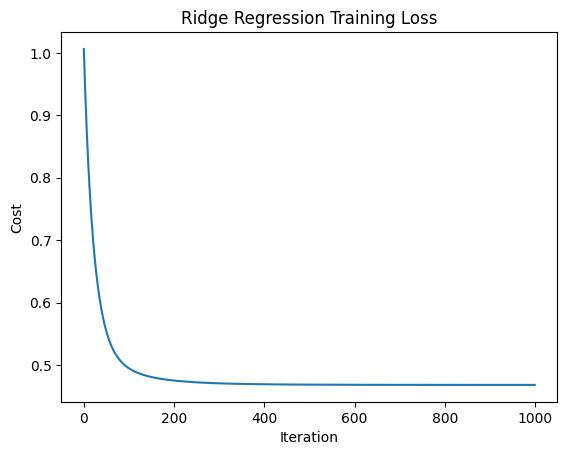

Final Weights: [-0.21120112422056064 -0.2084786818188811 -0.005524142094553183
 0.12371720822240577 -0.21934147285964573 0.1246270034847408
 0.5403312046687061 0.15896260742005056 -0.3673205654922811
 0.0029322608295678115 0.060660330567979905 0.15256893818098832]
Final Bias: 0.03113997808503464


In [20]:
#Test ridge regression

m=int(len(Y_train))
m_te=int(len(Y_test))
learning_rate=0.01
penalty=0.1
iterations=1000
model=RidgeRegression(learning_rate=learning_rate,iterations=iterations,penalty=penalty)

W,b,cost_graph=model.fit(X_train,Y_train)

y_pred_tr=model.predict(X_train)

MSE_tr=1/m*np.sum((Y_train-y_pred_tr)**2)

y_pred_te=model.predict(X_test)

MSE_te=1/m_te*np.sum((Y_test-y_pred_te)**2)

print("TrainingMSE:",MSE_tr,"Test MSE:",MSE_te,"Learning rate:",learning_rate,"penalty:",penalty, "# iterations",iterations)

#
plt.plot(cost_graph)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Ridge Regression Training Loss")
plt.show()

# === Step 5: Print results ===
print("Final Weights:", W.ravel())
print("Final Bias:", b)

0.0001
0.0001 complete
0.013252631578947368
0.013252631578947368 complete
0.026405263157894737
0.026405263157894737 complete
0.03955789473684211
0.03955789473684211 complete
0.05271052631578948
0.05271052631578948 complete
0.06586315789473685
0.06586315789473685 complete
0.07901578947368422
0.07901578947368422 complete
0.09216842105263158
0.09216842105263158 complete
0.10532105263157895
0.10532105263157895 complete
0.11847368421052633
0.11847368421052633 complete
0.13162631578947367
0.13162631578947367 complete
0.14477894736842103
0.14477894736842103 complete
0.15793157894736842
0.15793157894736842 complete
0.17108421052631578
0.17108421052631578 complete
0.18423684210526314
0.18423684210526314 complete
0.19738947368421053
0.19738947368421053 complete
0.2105421052631579
0.2105421052631579 complete
0.22369473684210525
0.22369473684210525 complete
0.23684736842105264
0.23684736842105264 complete
0.25
0.25 complete


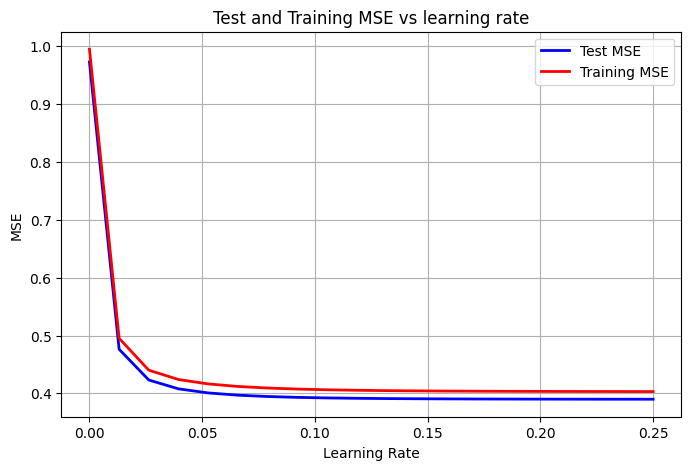

In [21]:
#Check for model performance vs learning rate
W_0=np.zeros((n,1)) #initial W
m=int(len(Y_train))
m_te=int(len(Y_test))
learning_rate=np.linspace(0.0001,0.25,20)
penalty=0.1
iterations=50
MSE_te_list=[]
MSE_tr_list=[]
#fix iterations to be 50, penalty be 0
for lr in learning_rate:
    print(lr)
    model=RidgeRegression(learning_rate=lr,iterations=iterations,penalty=penalty)

    W,b,cost_graph=model.fit(X_train,Y_train)

    y_pred_tr=model.predict(X_train)

    MSE_tr=1/m*np.sum((Y_train-y_pred_tr)**2)
    MSE_tr_list.append(MSE_tr)
    y_pred_te=model.predict(X_test)

    MSE_te=1/m_te*np.sum((Y_test-y_pred_te)**2)
    MSE_te_list.append(MSE_te)
    print(lr,"complete")

plt.figure(figsize=(8, 5))
plt.plot(learning_rate, MSE_te_list, label='Test MSE', color='blue', linewidth=2)
plt.plot(learning_rate, MSE_tr_list, label='Training MSE', color='red', linewidth=2)

# Add labels and title
plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.title('Test and Training MSE vs learning rate')

# Add legend
plt.legend()

# Optional: grid
plt.grid(True)

# Show the plot
plt.show()

0.001
0.001 complete
0.001725210549942041
0.001725210549942041 complete
0.002976351441631319
0.002976351441631319 complete
0.005134832907437549
0.005134832907437549 complete
0.008858667904100823
0.008858667904100823 complete
0.015283067326587688
0.015283067326587688 complete
0.026366508987303583
0.026366508987303583 complete
0.04548777947003775
0.04548777947003775 complete
0.07847599703514611
0.07847599703514611 complete
0.13538761800225432
0.13538761800225432 complete
0.23357214690901212
0.23357214690901212 complete
0.40296113202003997
0.40296113202003997 complete
0.6951927961775606
0.6951927961775606 complete
1.1993539462092344
1.1993539462092344 complete
2.069138081114788
2.069138081114788 complete
3.5696988468260624
3.5696988468260624 complete
6.158482110660261
6.158482110660261 complete
10.624678308940409
10.624678308940409 complete
18.32980710832434
18.32980710832434 complete
31.622776601683793
31.622776601683793 complete


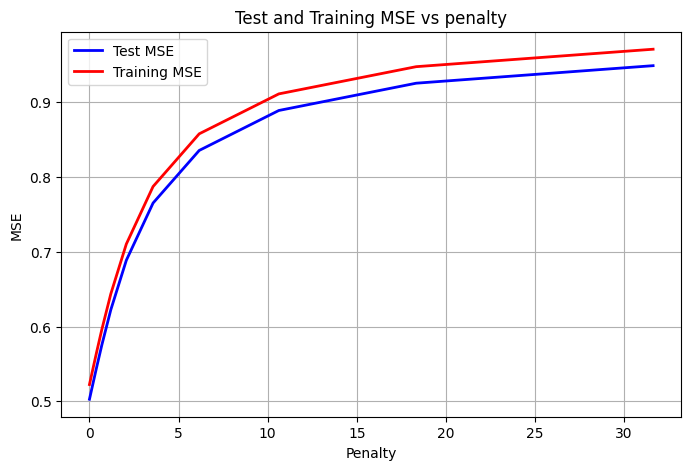

In [22]:
#Check for model performance vs penalty
W_0=np.zeros((n,1)) #initial W
m=int(len(Y_train))
m_te=int(len(Y_test))
learning_rate=0.01
penalty=np.logspace(-3,1.5,20)
iterations=50
MSE_te_list=[]
MSE_tr_list=[]
#fix iterations to be 50, learning rate be 0.01
for pe in penalty:
    print(pe)
    model=RidgeRegression(learning_rate=learning_rate,iterations=iterations,penalty=pe)

    W,b,cost_graph=model.fit(X_train,Y_train)

    y_pred_tr=model.predict(X_train)

    MSE_tr=1/m*np.sum((Y_train-y_pred_tr)**2)
    MSE_tr_list.append(MSE_tr)
    y_pred_te=model.predict(X_test)

    MSE_te=1/m_te*np.sum((Y_test-y_pred_te)**2)
    MSE_te_list.append(MSE_te)
    print(pe,"complete")

plt.figure(figsize=(8, 5))
plt.plot(penalty, MSE_te_list, label='Test MSE', color='blue', linewidth=2)
plt.plot(penalty, MSE_tr_list, label='Training MSE', color='red', linewidth=2)

# Add labels and title
plt.xlabel('Penalty')
plt.ylabel('MSE')
plt.title('Test and Training MSE vs penalty')

# Add legend
plt.legend()

# Optional: grid
plt.grid(True)

# Show the plot
plt.show()

For itertions number, the greater the iteration number, the lower the MSE but the MSE  has a asymptotes such that after sufficient iterations, more iterations does not really affect MSE at any noticeable amount.

In [24]:
#Compare Ridge Regression model with Sk linear model
from sklearn.linear_model import LinearRegression
sk=LinearRegression().fit(X_train,Y_train)
print("weights are:",sk.coef_)
print("b is:",sk.intercept_)
pred_sk_tr=sk.predict(X_train)

MSE_tr_sk=1/m*np.sum((Y_train-pred_sk_tr)**2)


pred_sk_te=sk.predict(X_test)

MSE_te_sk=1/m_te*np.sum((Y_test-pred_sk_te)**2)

print("TrainingMSE:",MSE_tr_sk,"Test MSE:",MSE_te_sk)

weights are: [[-0.50801943 -0.50784608 -0.15768476  0.3363376  -0.42362869  0.24492848
   0.60812197 -0.25419555 -0.7161881   1.60163458 -0.39977655 -0.23147437]]
b is: [0.42191447]
TrainingMSE: 0.3793043811339942 Test MSE: 0.38057629857789305
